First 5 rows:
    age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  

Missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal     

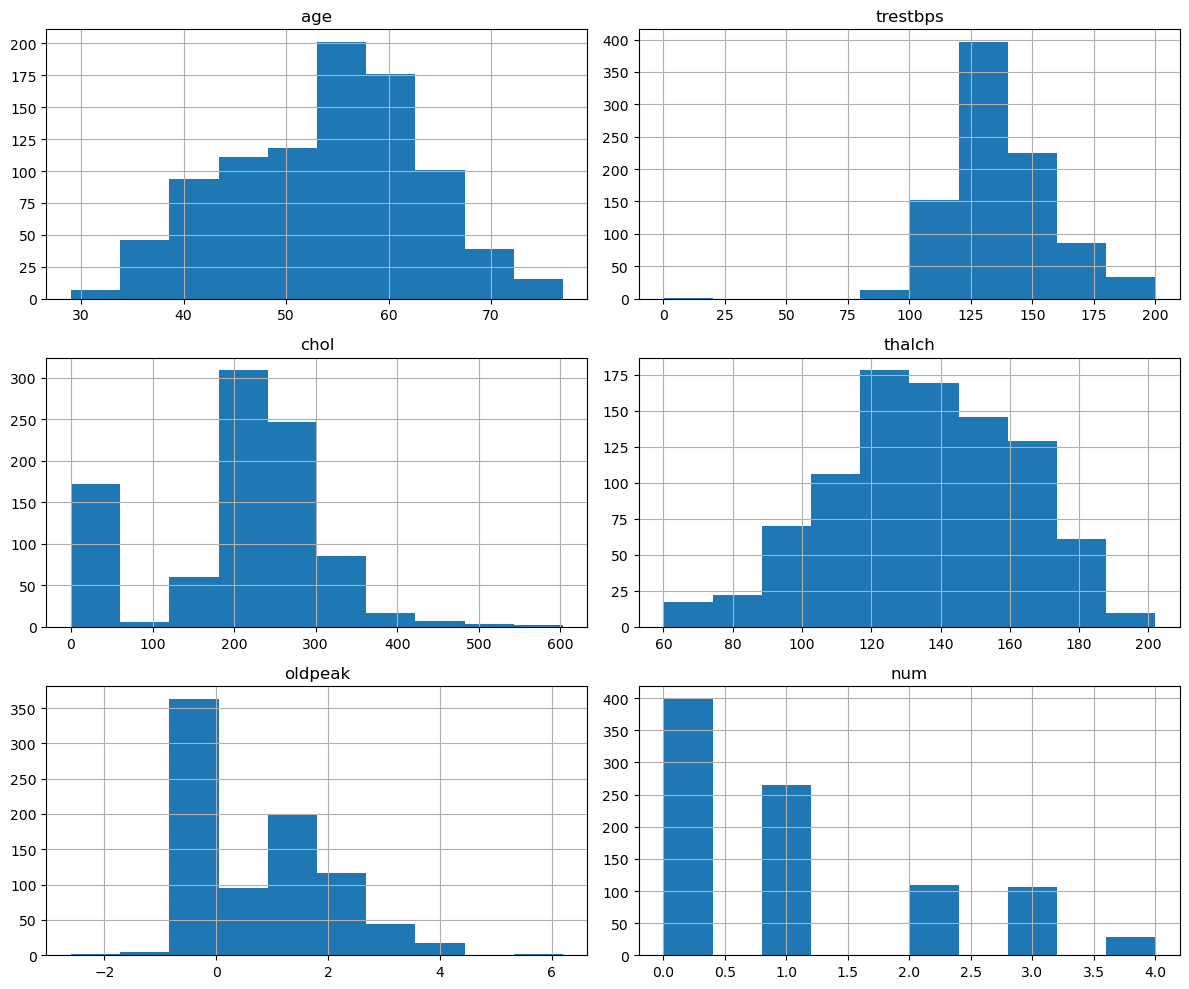

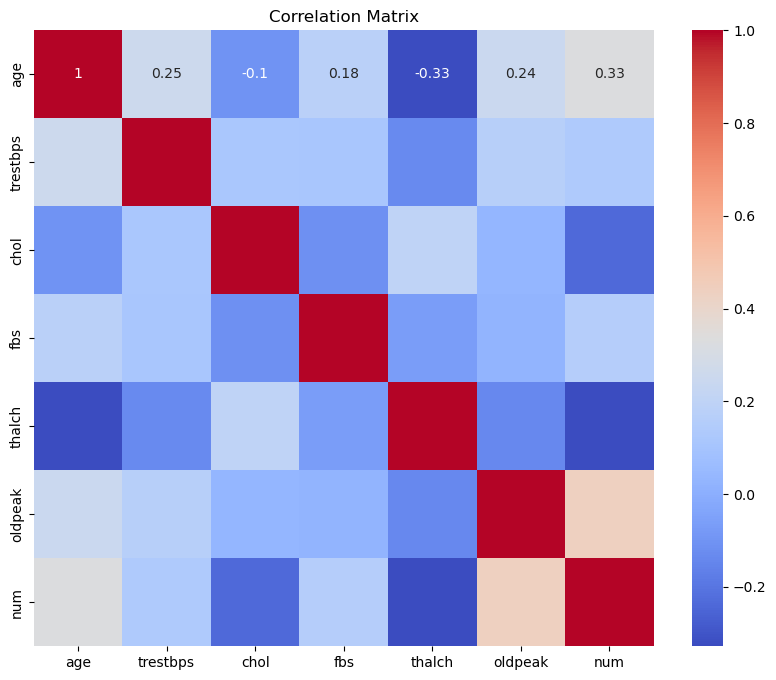

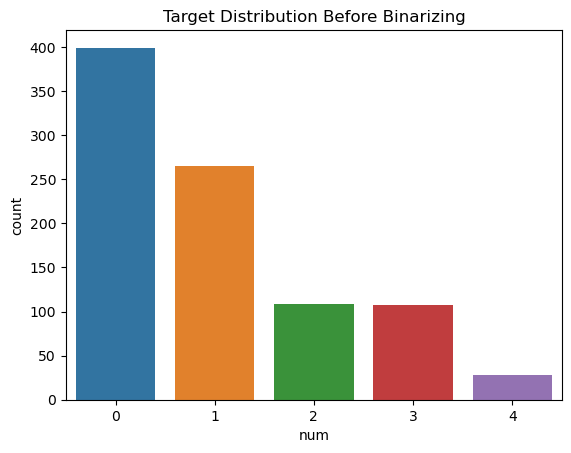

Encoding column: sex
Encoding column: cp
Encoding column: restecg
Encoding column: exang
Encoding column: slope
Encoding column: thal
Initial Model Performance:
Accuracy: 0.7417582417582418
Precision: 0.7446808510638298
Recall: 0.7526881720430108
F1 Score: 0.7486631016042781
ROC AUC: 0.7415126253473481
Confusion Matrix:
 [[65 24]
 [23 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73        89
           1       0.74      0.75      0.75        93

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



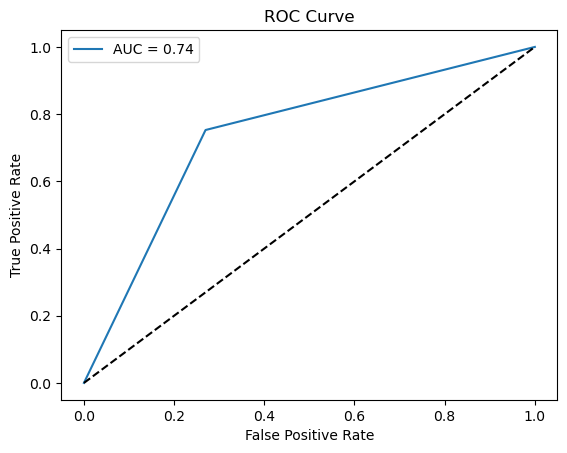

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

Tuned Model Accuracy: 0.7637362637362637
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        89
           1       0.77      0.76      0.77        93

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182



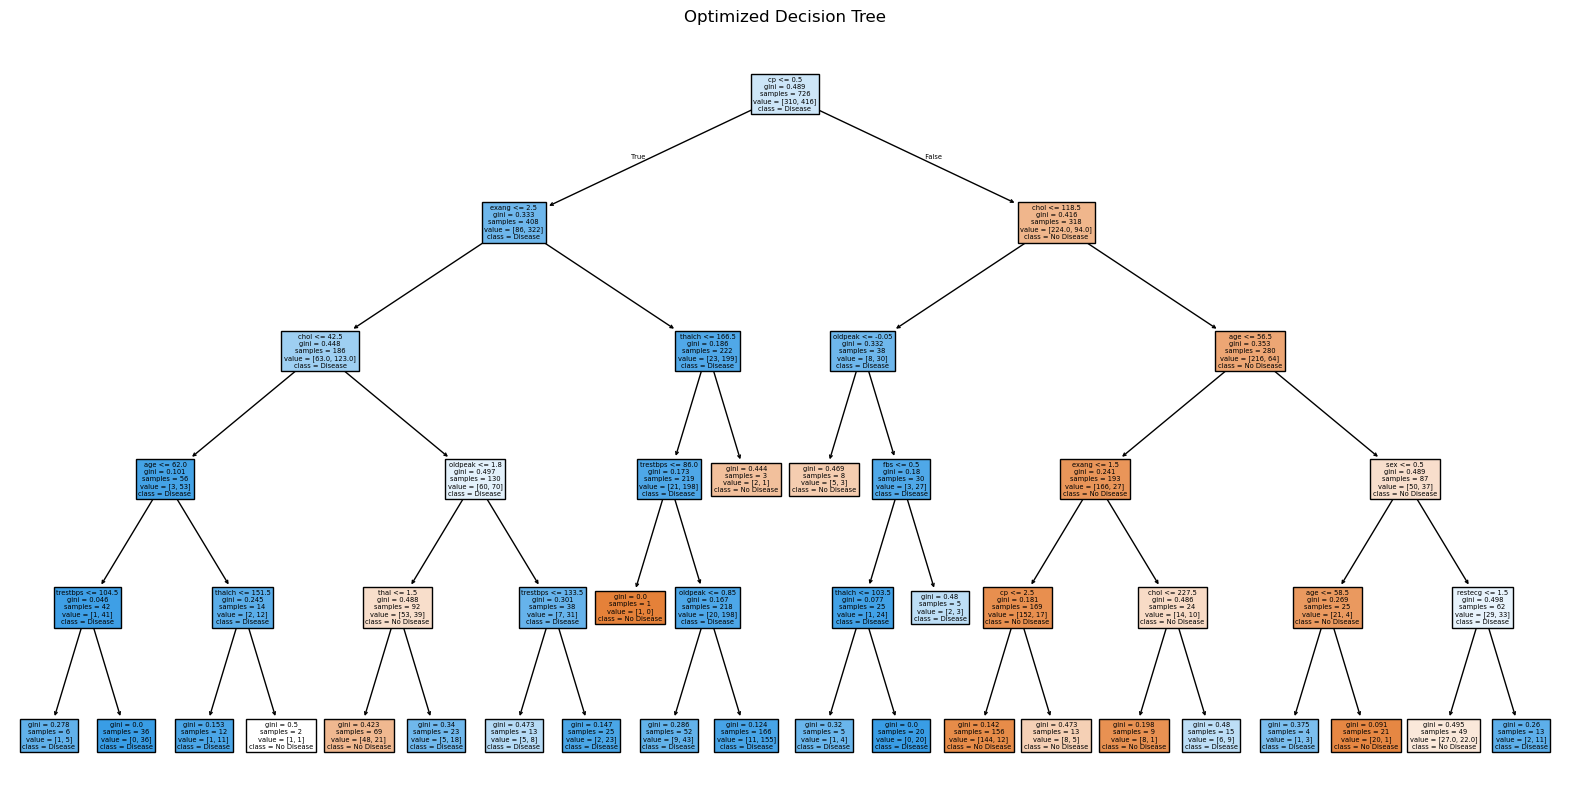

In [91]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve
)

#  Load dataset
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
df.columns = df.columns.str.strip().str.lower()  # clean column names
print("First 5 rows:\n", df.head())

#  EDA
print("\nMissing values:\n", df.isnull().sum())

# Plot feature distribution
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Countplot for target
sns.countplot(x='num', data=df)
plt.title("Target Distribution Before Binarizing")
plt.show()

#  Feature Engineering
# Convert 'num' to binary 
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Clean and encode object columns safely
for col in df.select_dtypes(include='object').columns:
    print(f"Encoding column: {col}")
    df[col] = df[col].astype(str)  # convert mixed types to string
    df[col] = LabelEncoder().fit_transform(df[col])


#  Split dataset
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Evaluation Metrics
print("Initial Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_clf = grid.best_estimator_
y_pred_best = best_clf.predict(X_test)

print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_best))

# 10. Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Optimized Decision Tree")
plt.show()
